In [3]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
import numpy as np 
import matplotlib.pyplot as plt

In [10]:
from sklearn.datasets import fetch_lfw_people # 加载方法、函数

In [11]:
faces = fetch_lfw_people()

In [12]:
faces # 整体也是一个字典

{'DESCR': 'LFW faces dataset',
 'data': array([[ 34.      ,  29.333334,  22.333334, ...,  14.666667,  16.      ,
          14.      ],
        [158.      , 160.66667 , 169.66667 , ..., 138.66667 , 135.33333 ,
         130.33333 ],
        [ 77.      ,  81.333336,  88.      , ..., 192.      , 145.33333 ,
          66.333336],
        ...,
        [ 38.      ,  41.666668,  55.333332, ...,  66.      ,  63.666668,
          54.333332],
        [ 16.666666,  24.333334,  60.333332, ..., 219.      , 143.33333 ,
          69.333336],
        [ 58.333332,  48.      ,  20.      , ..., 116.      , 106.333336,
         143.33333 ]], dtype=float32),
 'images': array([[[ 34.      ,  29.333334,  22.333334, ...,  20.      ,
           25.666666,  30.666666],
         [ 37.333332,  32.      ,  25.333334, ...,  21.      ,
           26.666666,  32.      ],
         [ 33.333332,  32.333332,  40.333332, ...,  23.666666,
           28.      ,  35.666668],
         ...,
         [166.      ,  97.      ,  44

In [8]:
faces.keys()

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

In [9]:
faces.data.shape # 纯数据的形式，特征向量，共13233个人脸数据，每个人脸数据共2914个元素

(13233, 2914)

In [13]:
faces.images.shape # 以images的形式解释样本行向量

(13233, 62, 47)

In [14]:
random_indexes = np.random.permutation(len(faces.data)) # 先乱序，然后在抽取和随机抽取其实是一个道理
X = faces.data[random_indexes]

In [15]:
example_faces = X[:36, :] #  我们队乱序后的X进行抽取显式
example_faces.shape

(36, 2914)

In [16]:
def plot_faces(faces):
    fig, axes = plt.subplots(6, 6, figsize=(10, 10), 
                            subplot_kw={'xticks':[], 'yticks':[]},
    gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(faces[i].reshape(62, 47), cmap='bone')
    plt.show()

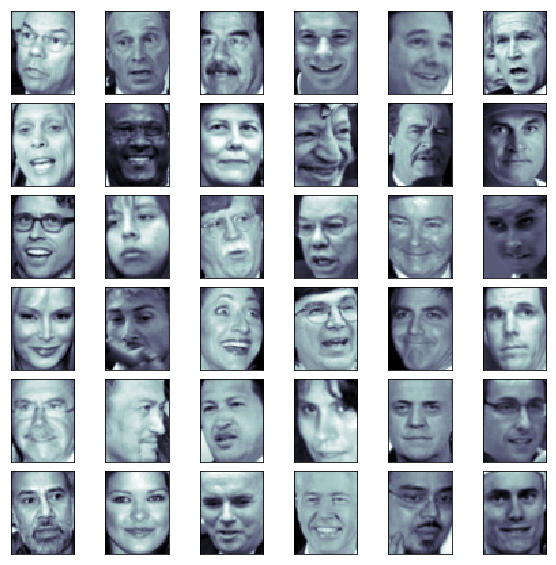

In [17]:
plot_faces(example_faces)

In [18]:
faces.target_names # 对人脸都是谁比较感兴趣

array(['AJ Cook', 'AJ Lamas', 'Aaron Eckhart', ..., 'Zumrati Juma',
       'Zurab Tsereteli', 'Zydrunas Ilgauskas'], dtype='<U35')

In [19]:
len(faces.target_names) # 人名个数，说明含有多少个人

5749

### 特征脸

In [21]:
%%time
# 没图书馆就待房间吧
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized') # 用随机的方式求取PCA，而且求出所有的主成分
#  使用SVD的PCA计算方法，同时因为数据库比较大，所以是用随机的方式求解会比较快一些
pca.fit(X)

Wall time: 26.3 s


In [24]:
pca.components_.shape # 所有的主成分

(2914, 2914)

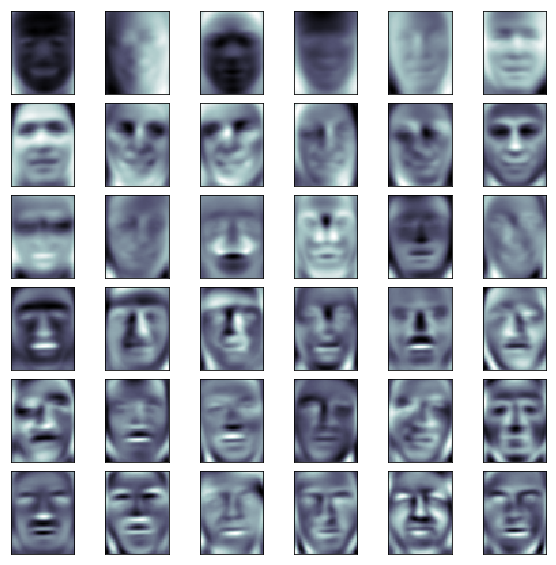

In [26]:
plot_faces(pca.components_[:36, :]) # 靠前的特征脸比较模糊

In [28]:
faces2 = fetch_lfw_people(min_faces_per_person=60)

In [29]:
faces2.data.shape

(1348, 2914)

In [31]:
faces2.target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Junichiro Koizumi',
       'Tony Blair'], dtype='<U17')

In [32]:
len(faces2.target_names)

8